# House Price Prediction Based on Attributes #

* Neural Network will be used as a regressor in order to predict residences prices based on the most important attributes. Dataframe from kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load ##

In [2]:
# Load Data as Pandas Dataframe:
house_data_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')
house_data_df.reset_index(drop = True, inplace = True) # Clear index if it exists
house_data_df.info()
house_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Pre-processing ##

* House price values are indicated by the attribute 'price'. So 'price' is the prediction goal.

In [3]:
house_data_df = house_data_df.drop(labels=['zipcode'], axis = 1) # cut off useless attributes
house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Data Visualization ##

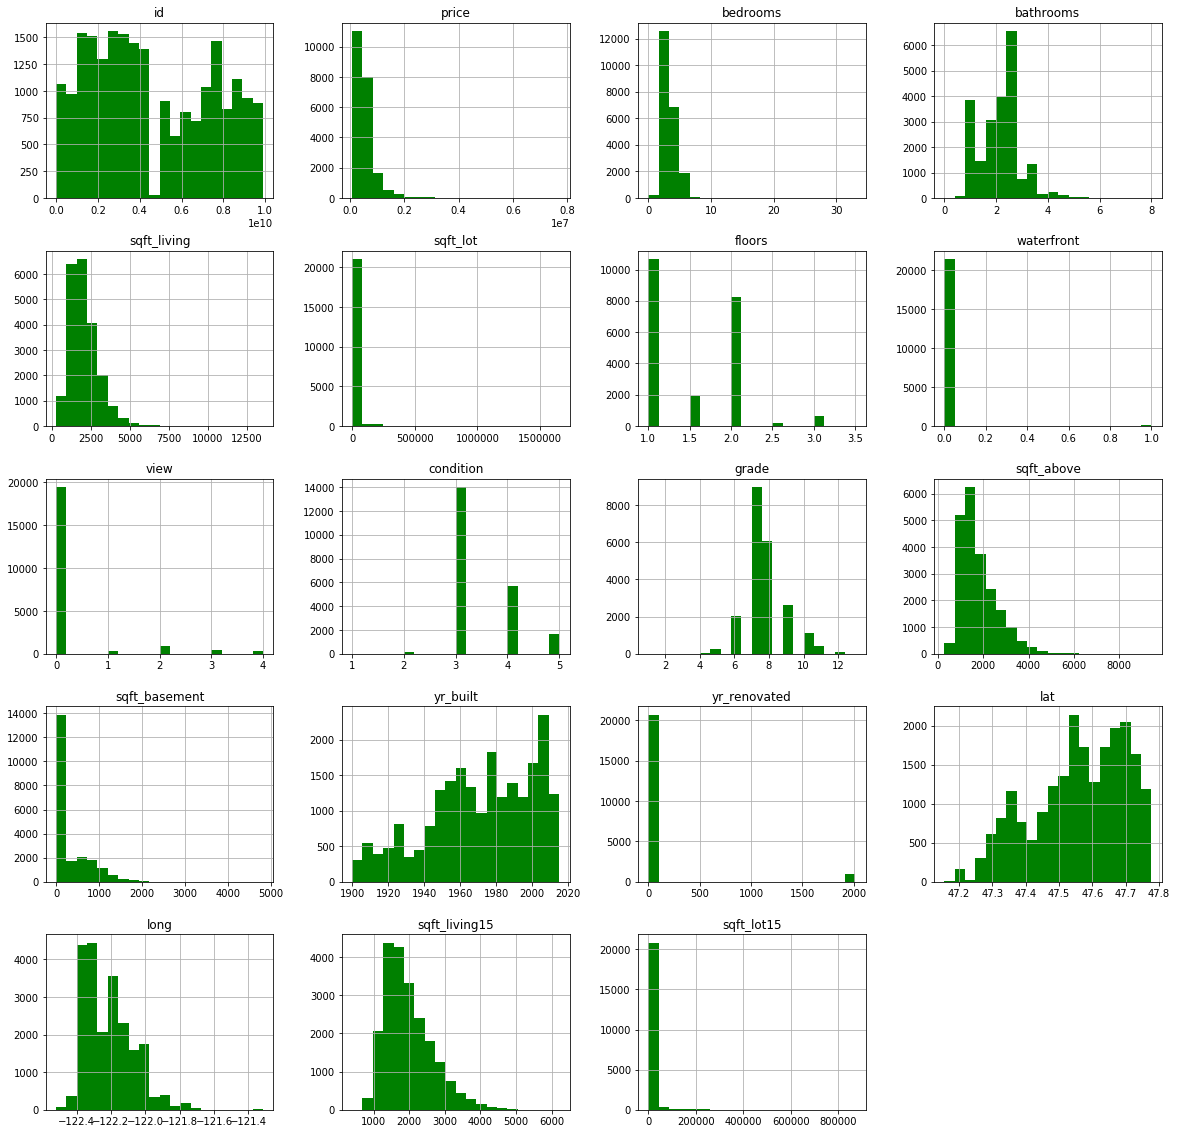

In [4]:
# Attributes Histograms:
house_data_df.hist(bins = 20, figsize = (20,20), color = 'g');

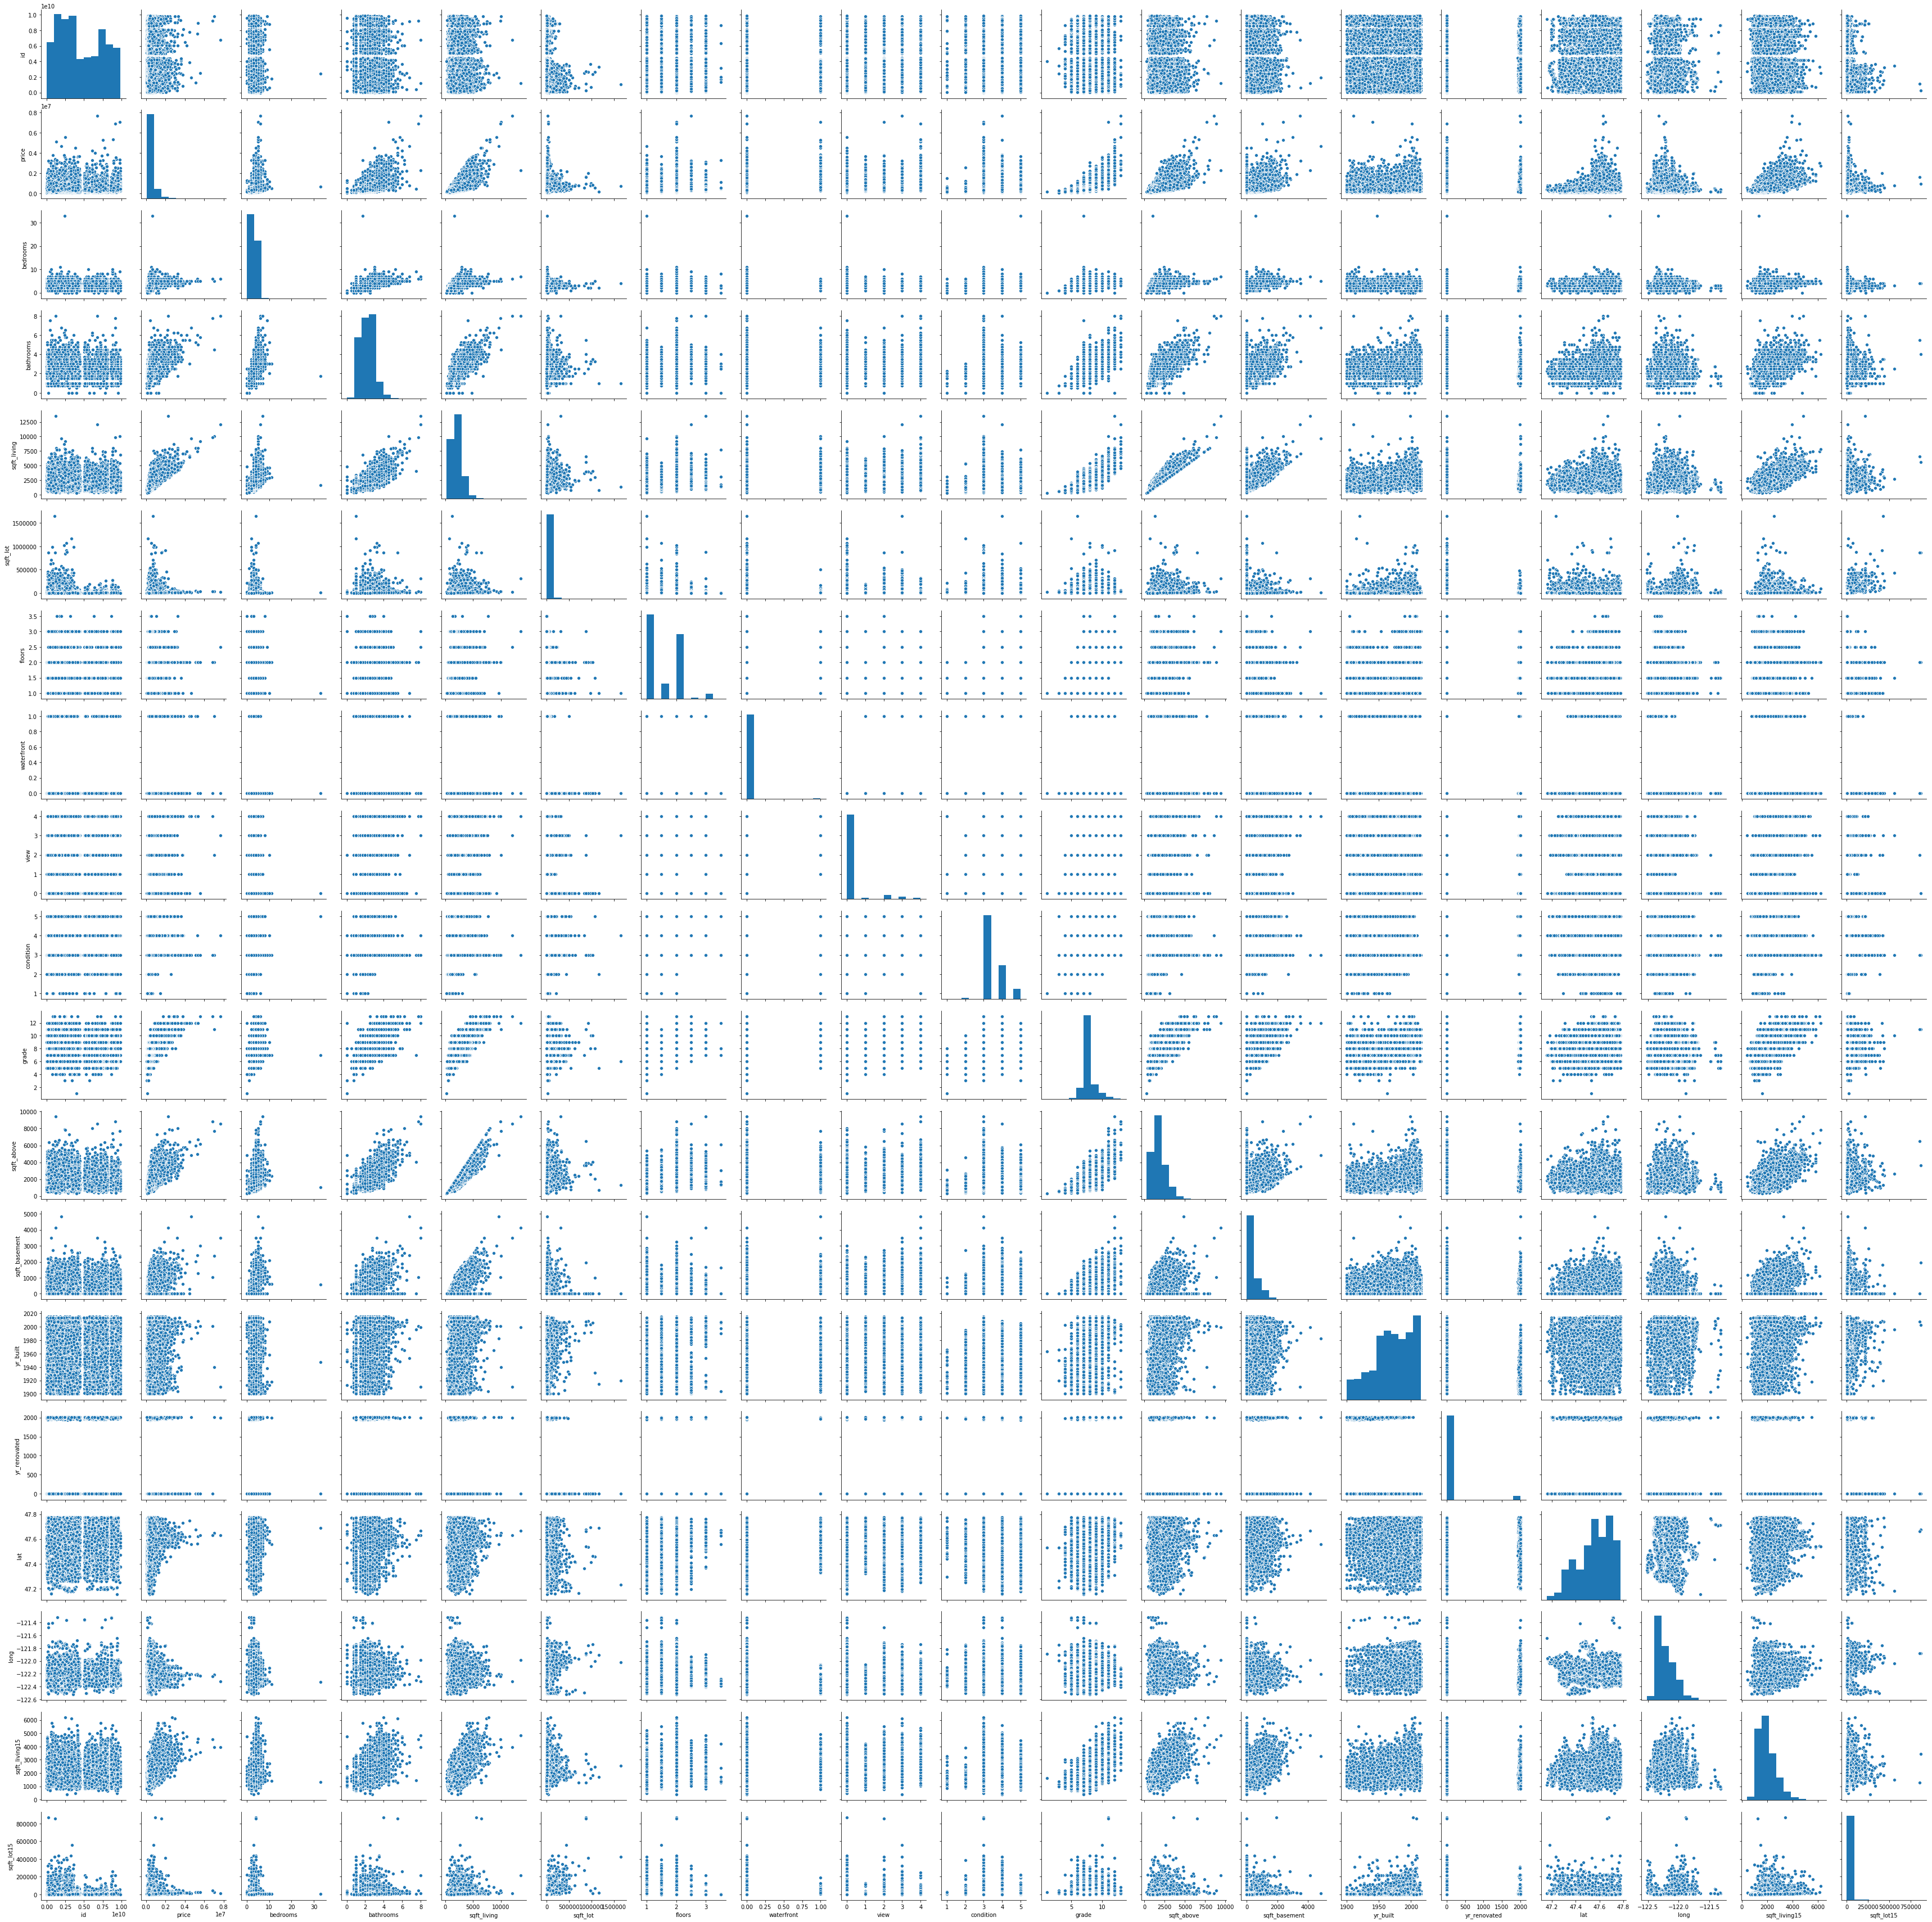

In [5]:
# Checking Attributes Relations:
sns.pairplot(house_data_df);

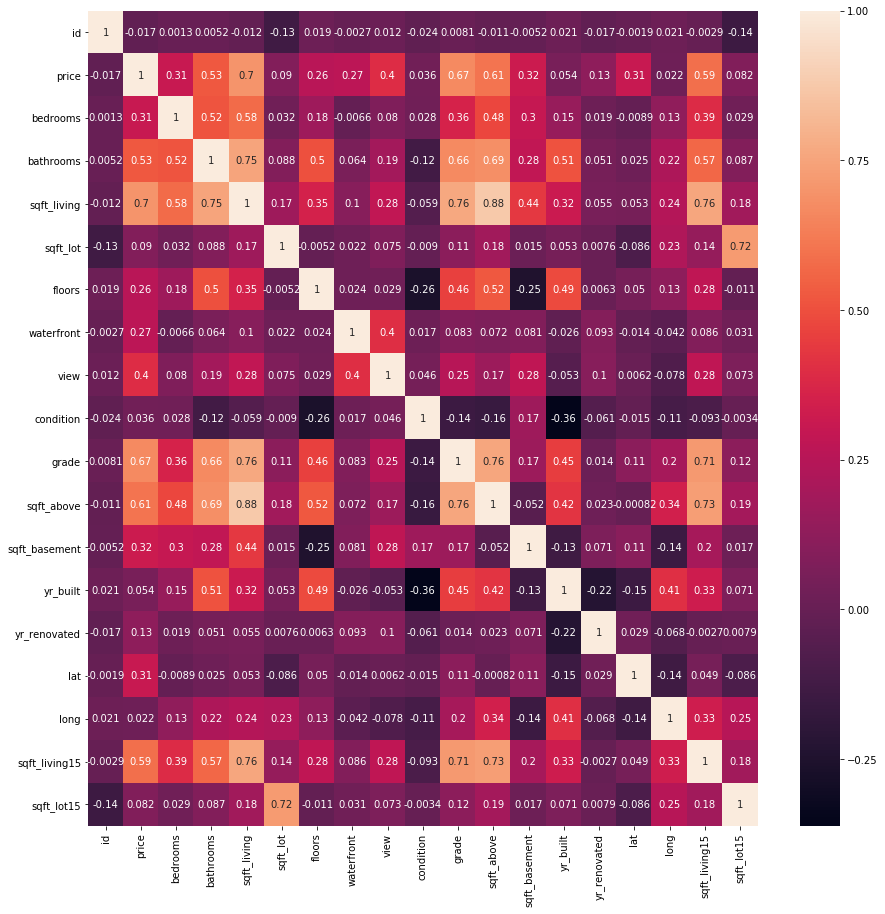

In [6]:
# Correlation heatmap:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(house_data_df.corr(), annot = True);

## More Data Processing ##

* After checking the dataframe pairplot the attributes with most relation to 'price' price data are selected to be part of the desired dataframe.

In [7]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

# Define input data X by the selected features:
X = house_data_df[selected_features]
print(X.shape)
X.head()

(21613, 7)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [8]:
# Define output data Y for goal as price:
Y = house_data_df['price']
print(Y.shape)
Y.head()

(21613,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

## Train and Test Data Preparation and Separation ##

In [ ]:
# Need to separate data in train/test and normalize

# First normalize Y to 0~1 values 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

Y = Y.values.reshape(-1,1) # single attribute needed to be reshaped
Y = scaler.fit_transform(Y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25) # 75% train, 25% test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16209, 7)
(5404, 7)
(16209, 1)
(5404, 1)


## Tensorflow - Neural Network Setup ##

In [ ]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf

In [14]:
# Network Setup
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(units = number of hidden layer neurons, input_shape = [number of input layer neuron]))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = [7,]))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear')) # Output for regression, using 'linear' as activation
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [15]:
learning_rate = 0.1
epochs = 100
batch_size = 50 
validation_split = 0.2 # 20% of the training data is used for validation

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 77us/sample - loss: 0.0012 - val_loss: 9.2929e-04
Epoch 2/100
12967/12967 [==============================] - 1s 45us/sample - loss: 0.0011 - val_loss: 9.2945e-04
Epoch 3/100
12967/12967 [==============================] - 1s 46us/sample - loss: 0.0011 - val_loss: 9.2508e-04
Epoch 4/100
12967/12967 [==============================] - 1s 54us/sample - loss: 0.0011 - val_loss: 0.0010
Epoch 5/100
12967/12967 [==============================] - 1s 50us/sample - loss: 0.0010 - val_loss: 9.3414e-04
Epoch 6/100
12967/12967 [==============================] - 1s 53us/sample - loss: 0.0010 - val_loss: 9.2074e-04
Epoch 7/100
12967/12967 [==============================] - 1s 49us/sample - loss: 0.0010 - val_loss: 8.9511e-04
Epoch 8/100
12967/12967 [==============================] - 1s 47us/sample - loss: 9.9792e-04 - val_loss: 9.0973e-04
Epoch 9/100
12967/12967 [==============================

12967/12967 [==============================] - 1s 45us/sample - loss: 9.1599e-04 - val_loss: 9.2293e-04
Epoch 71/100
12967/12967 [==============================] - 1s 43us/sample - loss: 9.2481e-04 - val_loss: 8.8299e-04
Epoch 72/100
12967/12967 [==============================] - 1s 44us/sample - loss: 9.3148e-04 - val_loss: 9.1920e-04
Epoch 73/100
12967/12967 [==============================] - 1s 44us/sample - loss: 9.3642e-04 - val_loss: 8.8318e-04
Epoch 74/100
12967/12967 [==============================] - 1s 45us/sample - loss: 9.1495e-04 - val_loss: 9.0169e-04
Epoch 75/100
12967/12967 [==============================] - 1s 43us/sample - loss: 9.2311e-04 - val_loss: 9.4081e-04
Epoch 76/100
12967/12967 [==============================] - 1s 47us/sample - loss: 9.1891e-04 - val_loss: 8.7952e-04
Epoch 77/100
12967/12967 [==============================] - 1s 48us/sample - loss: 9.1351e-04 - val_loss: 9.4050e-04
Epoch 78/100
12967/12967 [==============================] - 1s 48us/sample - 

## Model Error History Visualization ##

In [16]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

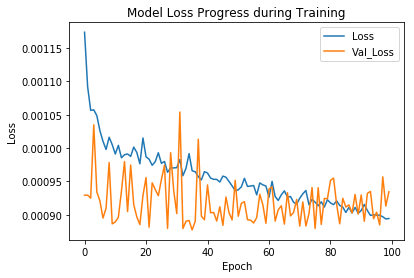

In [17]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val_Loss']);

## Model Prediction Results ##

In [18]:
Y_predict = model.predict(X_test)

Text(0, 0.5, 'True Values')

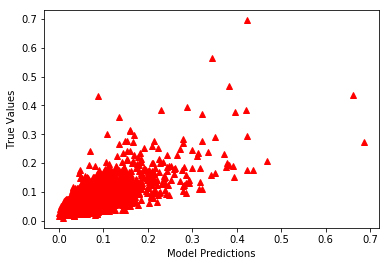

In [19]:
plt.plot(Y_test, Y_predict, '^', color = 'red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

Text(0, 0.5, 'True Values')

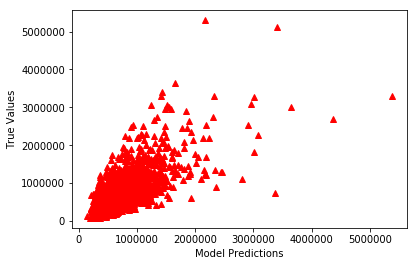

In [20]:
# Return to orginal scale (inverse of normalization)

y_predict_orig = scaler.inverse_transform(Y_predict)
y_test_orig = scaler.inverse_transform(Y_test)
plt.plot(y_predict_orig, y_test_orig, '^', color = 'red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

## Model Validation Metrics Results ##

In [21]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [22]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n-k-1)

print('MAE', mae)
print('MSE', mse)
print('RMSE', rmse)
print('R2', r2)
print('R2 ADJ', adj_r2)

MAE 155309.76723838825
MSE 57346134954.345024
RMSE 239470.53045071126
R2 0.5544989873531201
R2 ADJ 0.5539210579445715


## Comparison with Sklearn Linear Regression Function ##

Text(0, 0.5, 'Regressor')

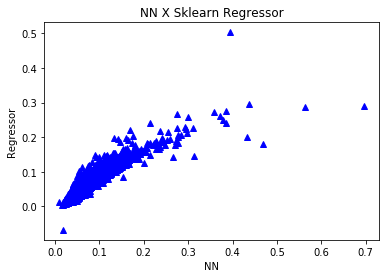

In [25]:
# Scikit Learn
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

plt.plot(model.predict(X_test), regressor.predict(X_test), '^', color = 'blue');
plt.title('NN X Sklearn Regressor')
plt.xlabel('NN')
plt.ylabel('Regressor')

In [26]:
mae = mean_absolute_error(y_test_orig, regressor.predict(X_test))
mse = mean_squared_error(y_test_orig, regressor.predict(X_test))
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n-k-1)

print('MAE', mae)
print('MSE', mse)
print('RMSE', rmse)
print('R2', r2)
print('R2 ADJ', adj_r2)

MAE 540788.9761952598
MSE 421175492932.55774
RMSE 648980.3486489847
R2 0.5544989873531201
R2 ADJ 0.5539210579445715
